In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "C:\\Users\\decent\\OneDrive\\Desktop\\Data_Science_DS_01\\DS_Task_04\\Highway-Rail_Grade_Crossing_Accident_Data.csv"
df = pd.read_csv(file_path)

print("Columns:", df.columns.tolist())

# Convert Date and Time to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour


C:\Users\decent\AppData\Local\Temp\ipykernel_15004\2010229714.py:7: DtypeWarning: Columns (6,7,8,25,26,38,42,50,51,52,53,59,64,69,87,88,89,95,97,98,99,100,101,106,126,127,128,129,130,133,139) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Columns: ['Railroad Code', 'Railroad Name', 'Report Year', 'Incident Number', 'Incident Year', 'Incident Month', 'Other Railroad Code', 'Other Railroad Name', 'Other Incident Number', 'Other Incident Year', 'Other Incident Month', 'Maintenance Incident Railroad Code', 'Maintenance Railroad Name', 'Maintainance Incident Number', 'Maintenance Incident Year', 'Maintenance Incident Month', 'Grade Crossing ID', 'Date', 'Time', 'Month', 'Day', 'Hour', 'Minute', 'AM/PM', 'Nearest Station', 'Division', 'Subdivision', 'County Code', 'County Name', 'State Code', 'State Name', 'City Name', 'Highway Name', 'Public/Private Code', 'Public/Private', 'Highway User Code', 'Highway User', 'Estimated Vehicle Speed', 'Vehicle Direction Code', 'Vehicle Direction', 'Highway User Position Code', 'Highway User Position', 'Equipment Involved Code', 'Equipment Involved', 'Railroad Car Unit Position', 'Equipment Struck Code', 'Equipment Struck', 'Hazmat Involvement Code', 'Hazmat Involvement', 'Hazmat Released b

C:\Users\decent\AppData\Local\Temp\ipykernel_15004\2010229714.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour


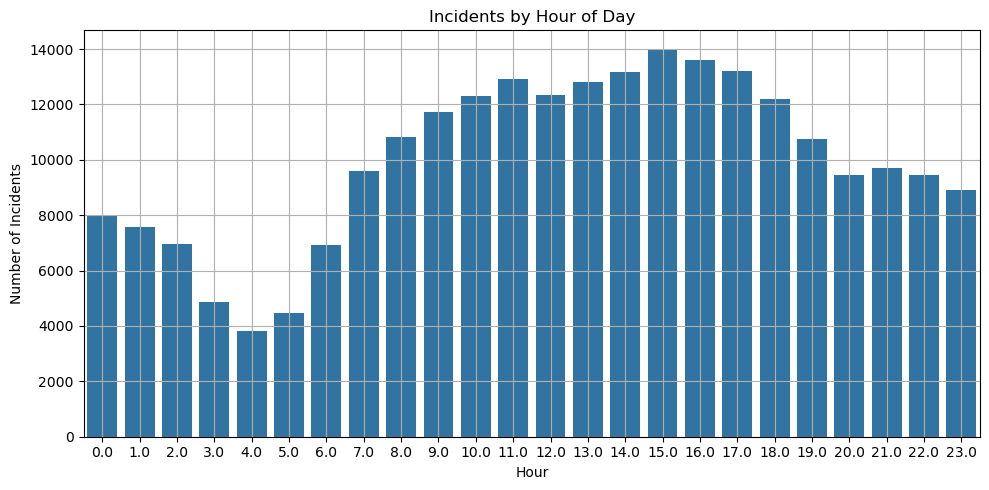

In [21]:
# Time-Based Analysis: Accidents by Hour
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=df)
plt.title('Incidents by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Incidents')
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()
plt.show()

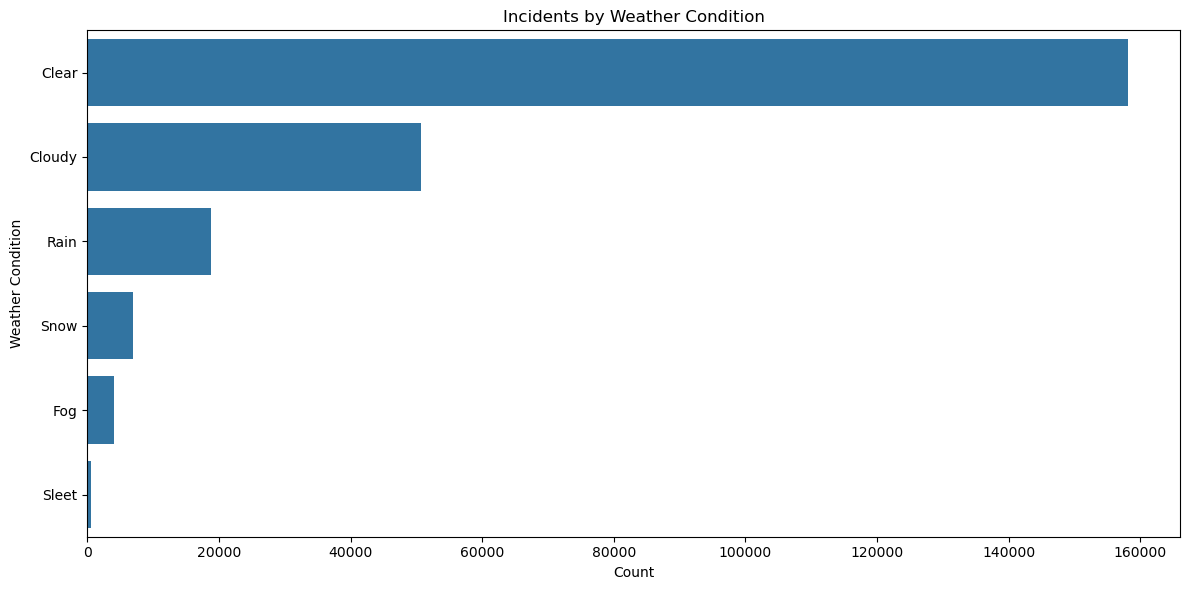

In [23]:
# Weather Condition Analysis (if available)
if 'Weather Condition' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y='Weather Condition', data=df, order=df['Weather Condition'].value_counts().index)
    plt.title('Incidents by Weather Condition')
    plt.xlabel('Count')
    plt.ylabel('Weather Condition')
    plt.tight_layout()
    plt.show()
    

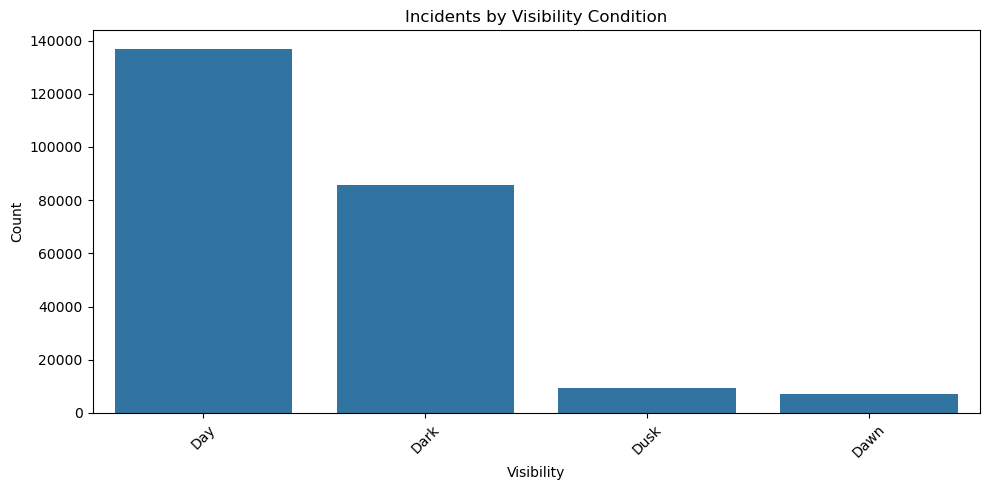

In [25]:
if 'Visibility' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Visibility', data=df, order=df['Visibility'].value_counts().index)
    plt.title('Incidents by Visibility Condition')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

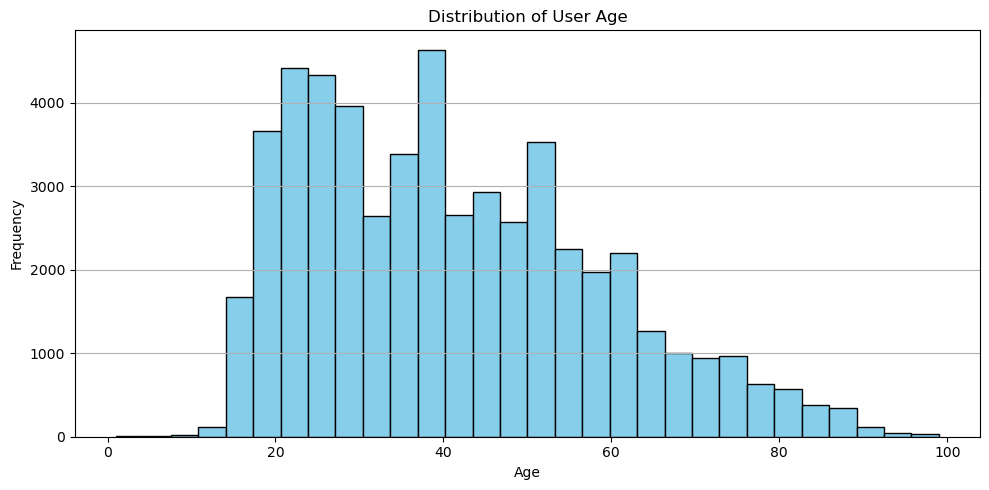

In [41]:
if 'User Age' in df.columns:
    plt.figure(figsize=(10,5))
    df['User Age'].dropna().astype(int).plot.hist(bins=30, color='skyblue', edgecolor='black')
    plt.title('Distribution of User Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


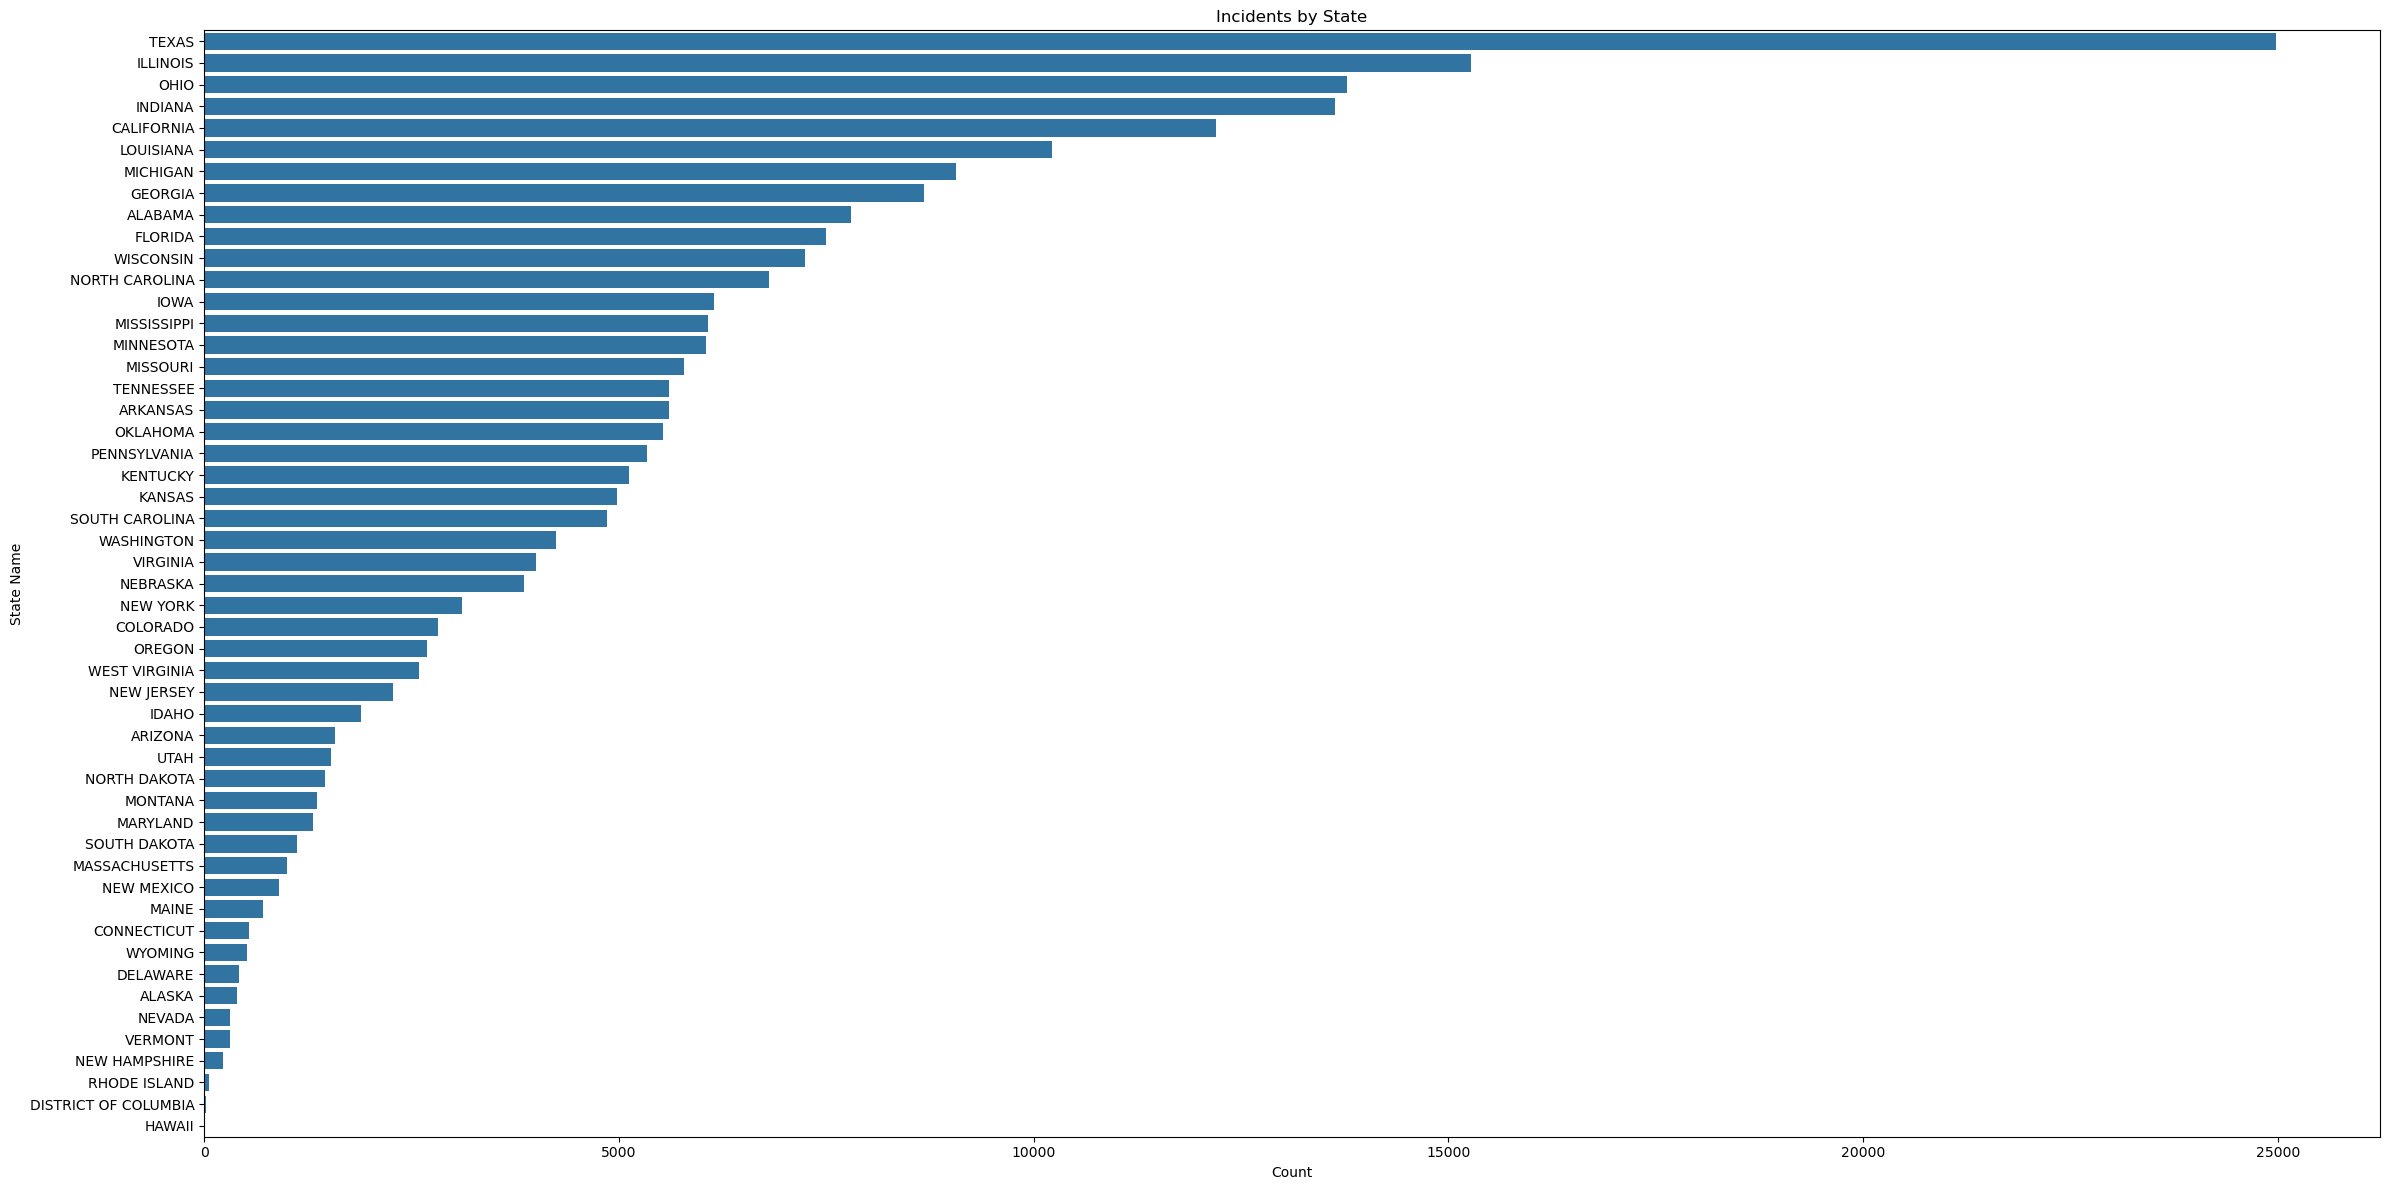

In [29]:
if 'State Name' in df.columns:
    plt.figure(figsize=(24, 12))
    sns.countplot(y='State Name', data=df, order=df['State Name'].value_counts().index)
    plt.title('Incidents by State')
    plt.xlabel('Count')
    plt.ylabel('State Name')
    plt.tight_layout()
    plt.show()

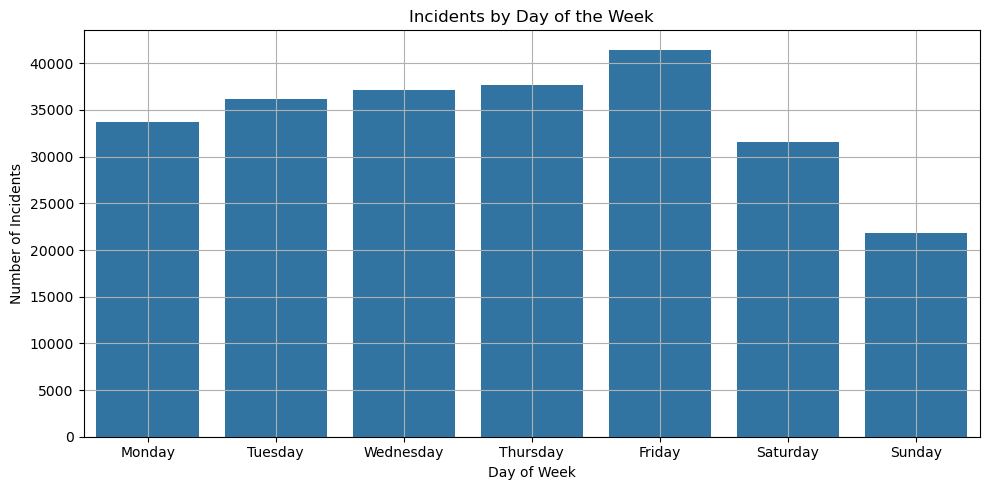

In [31]:
# Add Day of Week column
df['Day_of_Week'] = df['Date'].dt.day_name()

plt.figure(figsize=(10, 5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='Day_of_Week', data=df, order=order)
plt.title('Incidents by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()


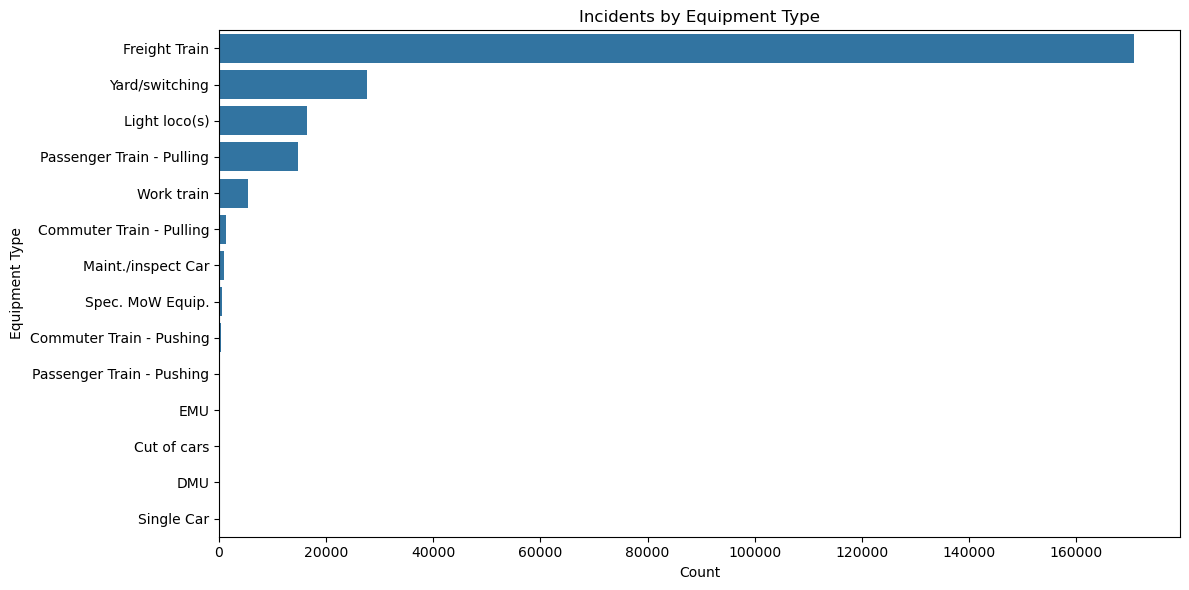

In [33]:
if 'Equipment Type' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y='Equipment Type', data=df, order=df['Equipment Type'].value_counts().index)
    plt.title('Incidents by Equipment Type')
    plt.xlabel('Count')
    plt.ylabel('Equipment Type')
    plt.tight_layout()
    plt.show()


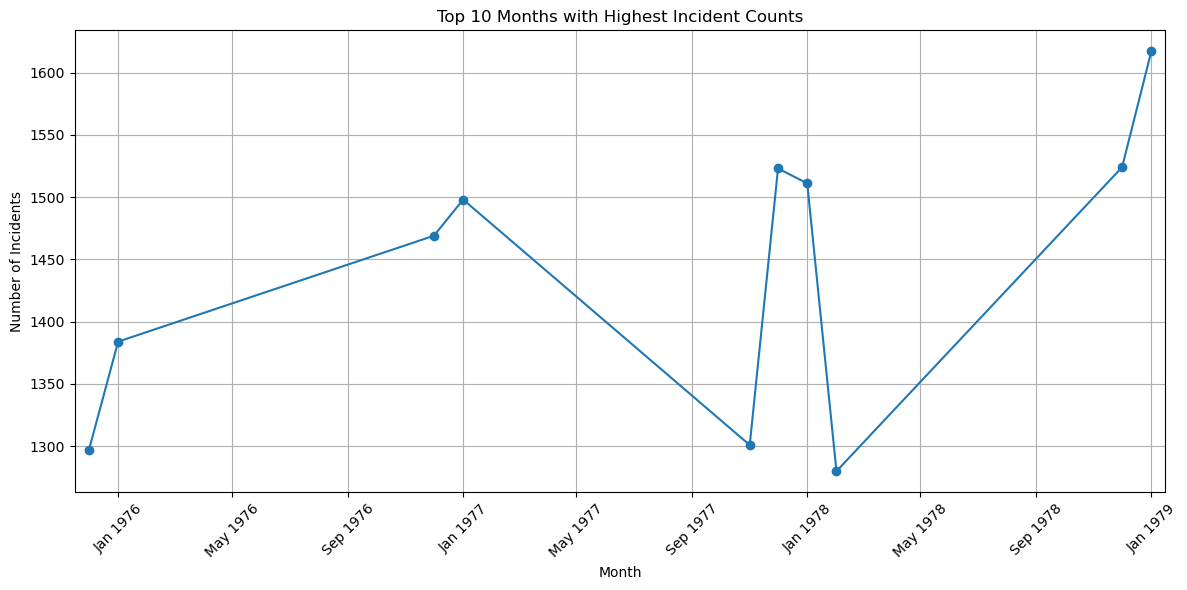

In [39]:
plt.figure(figsize=(12,6))
plt.plot(top10['Year_Month'], top10['Incidents'], marker='o', linestyle='-')
plt.title('Top 10 Months with Highest Incident Counts')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.grid(True)

# Set x-axis limits to focus on just those 10 months
plt.xlim(top10['Year_Month'].min() - pd.Timedelta(days=15), top10['Year_Month'].max() + pd.Timedelta(days=15))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


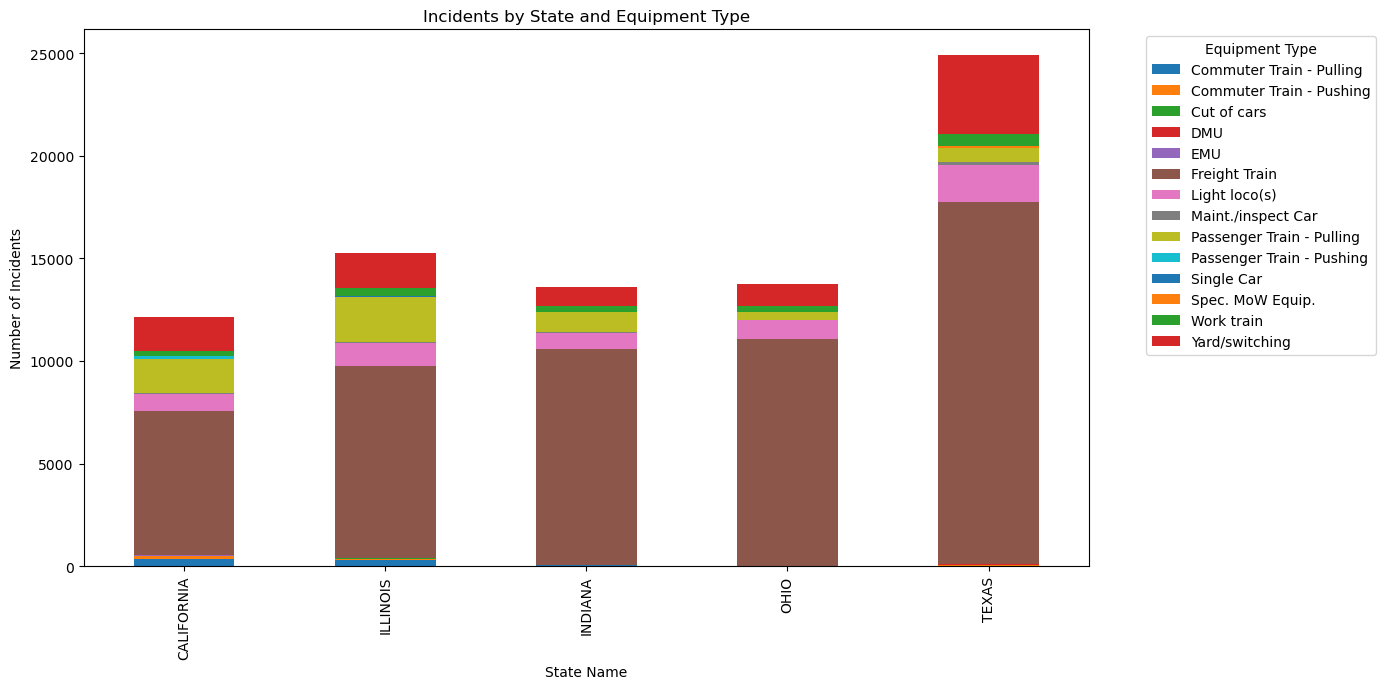

In [43]:
# Select top 5 states by incident count for clarity
top_states = df['State Name'].value_counts().head(5).index
filtered_df = df[df['State Name'].isin(top_states)]

# Pivot table: counts by state and equipment
pivot = filtered_df.pivot_table(index='State Name', columns='Equipment Type', aggfunc='size', fill_value=0)

pivot.plot(kind='bar', stacked=True, figsize=(14,7))
plt.title('Incidents by State and Equipment Type')
plt.xlabel('State Name')
plt.ylabel('Number of Incidents')
plt.legend(title='Equipment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
